Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

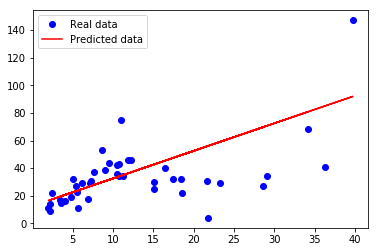

In [43]:
import os
import xlrd 
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

import utils 

DATA_FILE = 'fire_theft.xls'

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

book = xlrd.open_workbook(DATA_FILE, encoding_override ='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

w = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="b")

Y_predicted = X * w + b 
loss = tf.square(Y - Y_predicted, name='loss')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        total_loss = 0
        for x, y in data:
            l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l[1]
        print("Epoch {0}: {1}".format(i, total_loss/n_samples))
    w, b = sess.run([w, b])

        
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

